# ADS  Project

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [413]:
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

In [328]:
df = pd.read_csv("startups.csv", encoding='latin1')
print('Number of rows and columns: ', df.shape)
df.head()

Number of rows and columns:  (54294, 39)


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

*founded_at* is not being read properly, some numerical values like *funding_total_usd* is being read as a object

Also, some of the columns have space in front.

In [331]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [332]:
#Removing spaces from the front
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [333]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')

In [334]:
#Turning column into numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

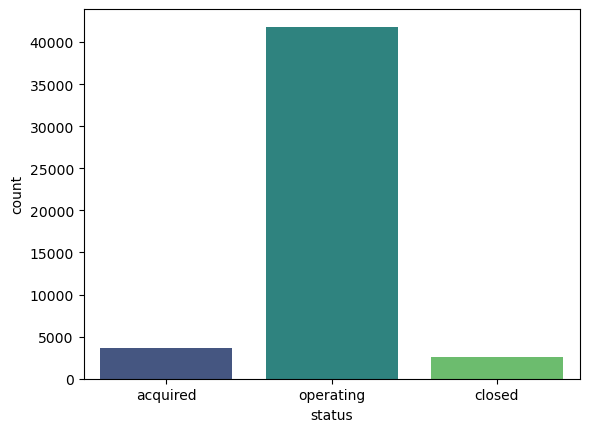

In [338]:
sns.countplot(x = df['status'], palette = 'viridis')
plt.show()

In [335]:
def year_segment(x):
    if x is None:
        return x
    elif (x) < 1910:
        return 'before 1910'
    elif (x) < 1930:
        return '1910 to 1930'
    elif (x) < 1950:
        return '1930 to 1950'
    elif (x) < 1970:
        return '1950 to 1970'
    elif (x) < 1990:
        return '1970 to 1990'
    elif (x) < 2010:
        return '1990 to 2010'
    elif (x) >= 2010:
        return 'after 2010'
    

df['year_segment'] = df['founded_year'].apply(lambda x: year_segment(x))  

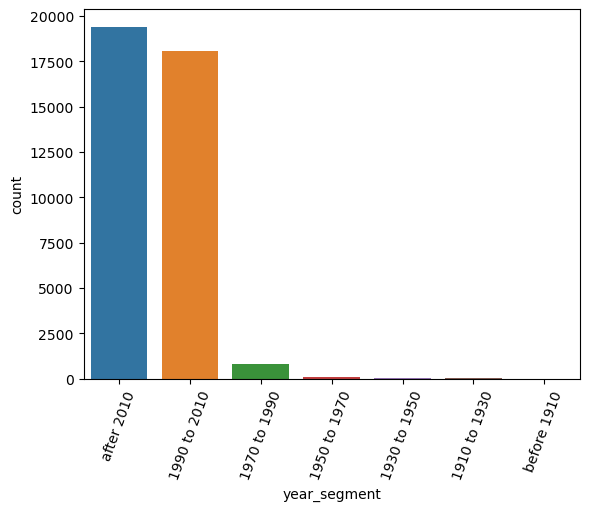

In [336]:
sns.countplot(data = df, x = df.year_segment)
plt.xticks(rotation = 70)
plt.show()

 There were a lot of startups emerged after year 1990.

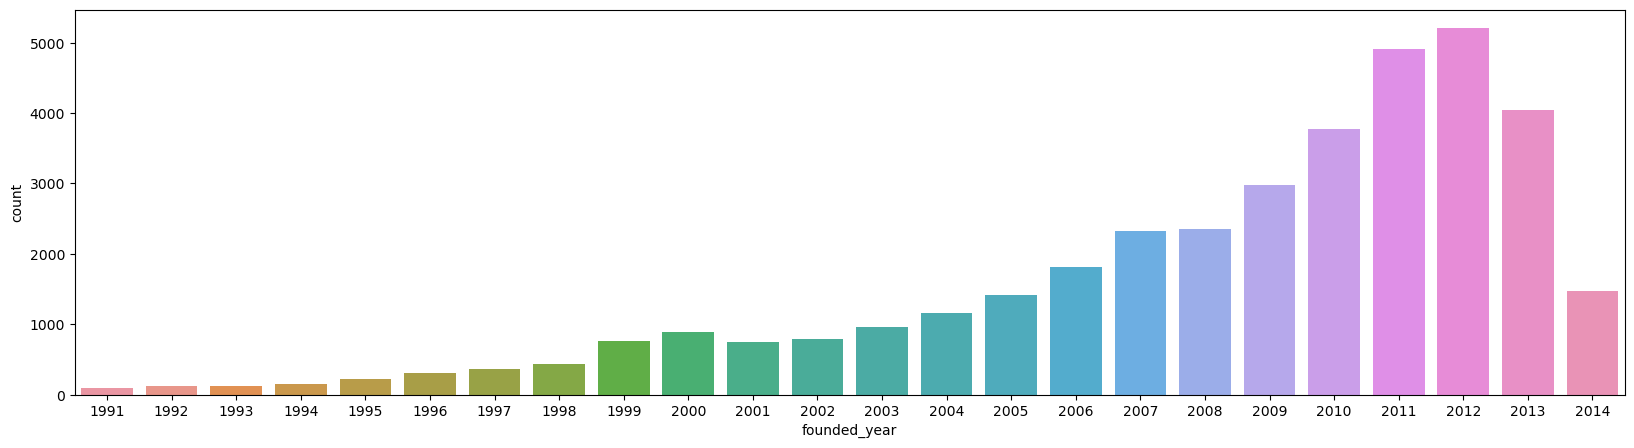

In [337]:
founded_year_df = df[(df.founded_year > 1990)][['founded_year']].astype(int)
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(data = founded_year_df, x = founded_year_df.founded_year)
plt.show()

The trend of emerging startups had a gradual increase upto the year 2012, after which there is a drastic fall

In [339]:
#converting date column into datetime 
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') 
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce') 
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce') 
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')

In [340]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15741
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4866
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

Dataset has some null values. Some of the columns have a lot of null values eg: *state code* and *founded years*

In [341]:
df.isnull().sum()/df.count() *100   #percentage of null values in each column

permalink                9.822404
name                     9.824625
homepage_url            18.058666
category_list           19.387822
market                  19.406202
funding_total_usd        9.822404
status                  12.821046
country_code            22.934450
state_code              80.013925
region                  22.934450
city                    25.326624
funding_rounds           9.822404
founded_at              40.829507
founded_month           41.089340
founded_quarter         41.089340
founded_year            41.089340
first_funding_at         9.844622
last_funding_at          9.835734
seed                     9.822404
venture                  9.822404
equity_crowdfunding      9.822404
undisclosed              9.822404
convertible_note         9.822404
debt_financing           9.822404
angel                    9.822404
grant                    9.822404
private_equity           9.822404
post_ipo_equity          9.822404
post_ipo_debt            9.822404
secondary_mark

In [342]:
df.isin([0]).sum()    # the number of zeros in the dataset

permalink                   0
name                        0
homepage_url                0
category_list               0
market                      0
funding_total_usd        8531
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                    35598
venture                 26161
equity_crowdfunding     48916
undisclosed             48486
convertible_note        48881
debt_financing          45213
angel                   46309
grant                   48296
private_equity          48065
post_ipo_equity         49122
post_ipo_debt           49363
secondary_market        49419
product_crowdfunding    49225
round_A                 40435
round_B                 43991
round_C   

Some columns also have a lot of zeros

In [343]:
(df.isin([0]).sum()/df.count()) *100   #Calculating zeros as a percentage of the total rows for each column

permalink                0.000000
name                     0.000000
homepage_url             0.000000
category_list            0.000000
market                   0.000000
funding_total_usd       17.255957
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           0.000000
founded_at               0.000000
founded_month            0.000000
founded_quarter          0.000000
founded_year             0.000000
first_funding_at         0.000000
last_funding_at          0.000000
seed                    72.005340
venture                 52.916785
equity_crowdfunding     98.944132
undisclosed             98.074356
convertible_note        98.873336
debt_financing          91.453942
angel                   93.670860
grant                   97.690036
private_equity          97.222784
post_ipo_equity         99.360816
post_ipo_debt           99.848295
secondary_mark

In [344]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,permalink,object,54294,49437,4856
1,name,object,54294,49351,4857
2,homepage_url,object,54294,45851,8305
3,category_list,object,54294,16676,8817
4,market,object,54294,754,8824
5,funding_total_usd,float64,54294,14618,4856
6,status,object,54294,4,6170
7,country_code,object,54294,116,10129
8,state_code,object,54294,62,24133
9,region,object,54294,1090,10129


In [345]:
df.status.unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

status column have 3 different values, this is what we are going to use to predict against

In [346]:
#number of companies with each status type
df.groupby('status')['name'].nunique()

status
acquired      3691
closed        2602
operating    41762
Name: name, dtype: int64

In [347]:
# no. of unique country code
df['country_code'].nunique() 

115

In [348]:
#number of companies in each country_code
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50)

country_code
USA    28756
GBR     2642
CAN     1405
CHN     1238
DEU      966
FRA      866
IND      849
ISR      681
ESP      549
RUS      368
SWE      315
AUS      314
ITA      308
NLD      307
IRL      306
SGP      299
BRA      293
CHL      285
JPN      283
KOR      246
CHE      222
DNK      210
FIN      194
ARG      149
BEL      149
HKG      126
TUR      124
AUT      103
NOR       98
POL       94
MEX       83
PRT       69
BGR       68
ARE       66
NZL       62
ZAF       52
IDN       52
CZE       51
MYS       48
UKR       45
EST       44
TWN       41
HUN       41
THA       38
COL       35
PHL       32
LTU       31
GRC       31
PER       29
NGA       29
Name: name, dtype: int64

Most of the values are from USA 

In [349]:
df.groupby('status')['funding_total_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.075578e+07,1.079477e+08,0.0,1100000.0,6000000.0,19500000.0,5.700000e+09
closed,2603.0,7.023194e+06,3.888355e+07,0.0,30000.0,500000.0,4000000.0,1.567504e+09
operating,41829.0,1.295244e+07,1.633604e+08,0.0,50000.0,999857.0,6000000.0,3.007950e+10


acquired companies have higher mean and median funding_total comapred to closed and operating. Closed companies have the lowest .

In [351]:
df1 = df.copy()

In [352]:
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'city', 'region', 'first_funding_at', 'last_funding_at','year_segment'])

In [353]:
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code'])
# dropping null values from these columns

In [354]:
df1.isnull().sum()

permalink               0
name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

In [355]:
df1.shape

(40477, 28)

---

The data contained 115 countries. The dataset was joined with a different dataset from github that contained the country name and continent. We made a new column for the continent name.

In [356]:
country = pd.read_csv(r'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv') # uploading dataset to map countyr code to continent
country = country[['alpha-3', 'region', 'name']]
country = country.dropna(how='any',axis=0) 
country.rename(columns = {'alpha-3':'Country_code', 'name':'Country_name', 'region':'Continent_name'}, inplace =True)
country.isnull().sum()

Country_code      0
Continent_name    0
Country_name      0
dtype: int64

In [357]:
df1 = df1.merge(country, left_on='country_code', right_on='Country_code')
# merging both datasets and creating new column called continent
df1.isnull().sum()

permalink               0
name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
Country_code            0
Continent_name          0
Country_name            0
dtype: int64

In [358]:
df1.groupby(by = ['Continent_name'])['permalink'].count() #number of companies in each continent

Continent_name
Africa        175
Americas    28578
Asia         3964
Europe       7403
Oceania       335
Name: permalink, dtype: int64

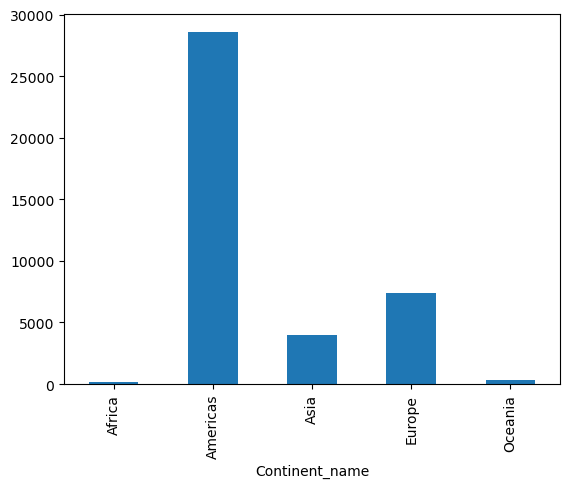

In [412]:
df1.groupby(by = ['Continent_name'])['permalink'].count().plot(kind ='bar')
plt.show()

##### Americas has the highest no of startups

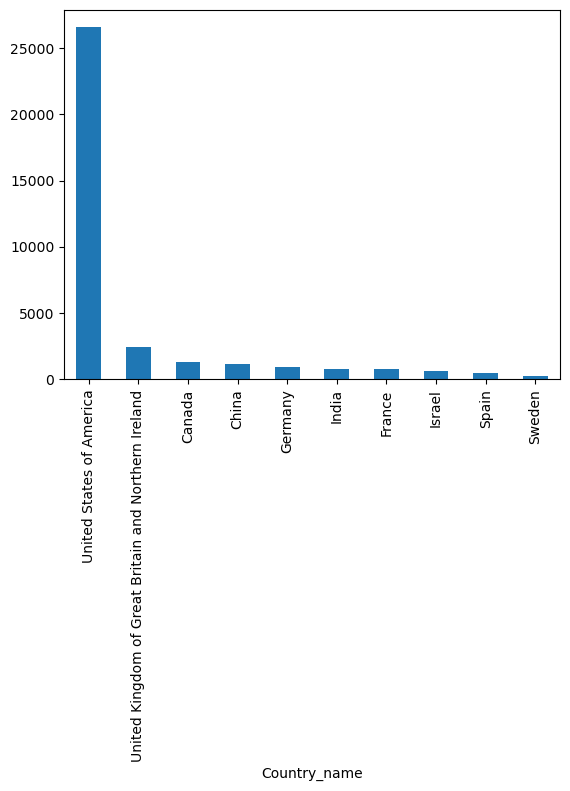

In [411]:
df1.groupby(by = ['Country_name'])['permalink'].count().sort_values(ascending=False).head(10).plot(kind ='bar')
plt.show()

In [359]:
df1.shape

(40455, 31)

In [360]:
df1.isin([0]).sum()

permalink                   0
name                        0
market                      0
funding_total_usd        5984
status                      0
country_code                0
funding_rounds              0
seed                    29366
venture                 19749
equity_crowdfunding     40004
undisclosed             39736
convertible_note        39963
debt_financing          36639
angel                   37781
grant                   39539
private_equity          39241
post_ipo_equity         40220
post_ipo_debt           40396
secondary_market        40439
product_crowdfunding    40281
round_A                 32284
round_B                 35351
round_C                 37750
round_D                 39210
round_E                 39956
round_F                 40287
round_G                 40423
round_H                 40451
Country_code                0
Continent_name              0
Country_name                0
dtype: int64

-----

The data contained 753 different market values. As there were a lot of different types of markets, we wanted to reduce this number. To reduce the number of markets, we grouped markets into different industry groups segment on the industry grouping list produced by crunchbase. The list can be found [here](http://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-). The new column Industry Group had 43 industry groups .

In [363]:
df1.market.nunique()

736

In [364]:
# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [365]:
import re
df1['Industry_Group'] = pd.np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

In [366]:
df1.Industry_Group.nunique()

43

<AxesSubplot:>

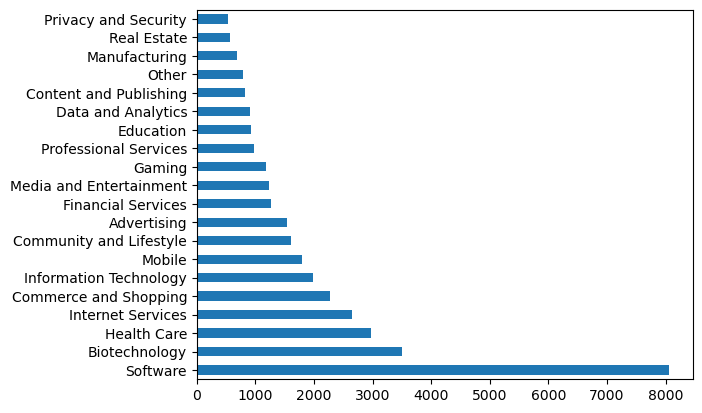

In [367]:
df1['Industry_Group'].value_counts()[0:20].plot(kind='barh')

In [368]:
temp = df1[df1['status']=='closed']

<AxesSubplot:>

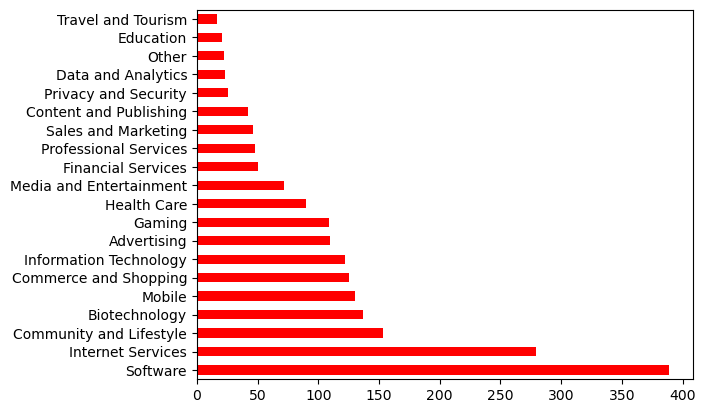

In [369]:
temp['Industry_Group'].value_counts()[0:20].plot(kind='barh',color='red')

The failure trend seems to follow the frequency of startups as the most failures are in the industries with the most start up. This makes sense as there might be immense competition in these categories

In [370]:
df2 = df1.copy()

In [371]:
df2 = df2.drop(['Country_code', 'Country_name', 'market'], axis=1) 

In [372]:
df2.head()

,permalink,name,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Continent_name,Industry_Group
0,/organization/waywire,#waywire,1750000.0,acquired,USA,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Content and Publishing
1,/organization/tv-communications,&TV Communications,4000000.0,operating,USA,2.0,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Gaming
2,/organization/r-ranch-and-mine,-R- Ranch and Mine,60000.0,operating,USA,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Travel and Tourism
3,/organization/004-technologies,004 Technologies,0.0,operating,USA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Software
4,/organization/1-4-all,1-4 All,0.0,operating,USA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Software


In [373]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,40455.0,1.462029e+07,1.663851e+08,0.0,115000.0,1424811.0,8287194.0,3.007950e+10
funding_rounds,40455.0,1.792708e+00,1.369797e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40455.0,2.356703e+05,1.139141e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,40455.0,8.569503e+06,3.083548e+07,0.0,0.0,100000.0,6000000.0,2.351000e+09
equity_crowdfunding,40455.0,5.911644e+03,1.706419e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40455.0,1.134780e+05,2.588204e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40455.0,2.722688e+04,1.581877e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40455.0,2.097214e+06,1.518768e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40455.0,6.831724e+04,5.768958e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40455.0,1.781824e+05,6.103431e+06,0.0,0.0,0.0,0.0,7.505000e+08


In [374]:
invest_categorical = pd.cut(df2.funding_total_usd, bins = [-1, 115000.0, 1424811.0, 8287194.0, 30079503000], labels=['low','low_medium','high_medium','high'])
df2.insert(0,'total_investment',invest_categorical) # creating new column called cat_total_investment

In [375]:
seed_categorical = pd.cut(df2.seed, bins = [-1, 25000, 130000000], labels=['low','high'])
df2.insert(0,'seed_categorical',seed_categorical)

In [376]:
venture_categorical = pd.cut(df2.venture, bins = [-1, 100000, 6000000, 2351000000], labels=['low','medium','high'])
df2.insert(0,'venture_categorical',venture_categorical)

In [377]:
df2

,venture_categorical,seed_categorical,total_investment,permalink,name,funding_total_usd,status,country_code,funding_rounds,seed,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Continent_name,Industry_Group
0,low,high,high_medium,/organization/waywire,#waywire,1750000.0,acquired,USA,1.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Content and Publishing
1,medium,low,high_medium,/organization/tv-communications,&TV Communications,4000000.0,operating,USA,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Gaming
2,low,low,low,/organization/r-ranch-and-mine,-R- Ranch and Mine,60000.0,operating,USA,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Travel and Tourism
3,low,low,low,/organization/004-technologies,004 Technologies,0.0,operating,USA,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Software
4,low,low,low,/organization/1-4-all,1-4 All,0.0,operating,USA,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,low,high,low_medium,/organization/trulysocial-apps,TrulySocial,1015000.0,operating,GIB,2.0,1015000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Community and Lifestyle
40451,high,low,high,/organization/wave-crest-holdings,Wave Crest Group,18929912.0,operating,GIB,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Software
40452,low,high,low,/organization/unyqe,Unyqe,35000.0,closed,SYC,1.0,35000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Africa,Software
40453,high,low,high,/organization/volubill,VoluBill,29220000.0,acquired,MAF,2.0,0.0,...,0.0,0.0,14380000.0,14840000.0,0.0,0.0,0.0,0.0,Americas,Software


In [378]:
df2.isnull().sum()

venture_categorical     0
seed_categorical        0
total_investment        0
permalink               0
name                    0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
Continent_name          0
Industry_Group          0
dtype: int64

In [379]:
df2['status_cat'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['total_investment'] = df2['total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['seed_categorical'] = df2['seed_categorical'].replace(['low', 'high'], [0, 1])
df2['venture_categorical'] = df2['venture_categorical'].replace(['low','medium','high'], [0, 1, 3])

In [380]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['Continent_Name_cat'] = labelencoder.fit_transform(df2['Continent_name']) # using label encoder on continent
df2['Industry_Group_cat'] = labelencoder.fit_transform(df2['Industry_Group']) # using label encoder on industry group

In [381]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,40445,40446,40447,40448,40449,40450,40451,40452,40453,40454
venture_categorical,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,3,0
seed_categorical,1,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,1,0,1,0,0
total_investment,2,2,0,0,0,0,2,0,2,0,...,1,0,2,0,0,1,3,0,3,0
permalink,/organization/waywire,/organization/tv-communications,/organization/r-ranch-and-mine,/organization/004-technologies,/organization/1-4-all,/organization/1-800-dentist,/organization/1-800-doctors,/organization/1-618-technology,/organization/10-20-media,/organization/1000-corks,...,/organization/sleepout-com,/organization/sportif225,/organization/tappress,/organization/tesseract-interactive,/organization/toria,/organization/trulysocial-apps,/organization/wave-crest-holdings,/organization/unyqe,/organization/volubill,/organization/xy-mobile
name,#waywire,&TV Communications,-R- Ranch and Mine,004 Technologies,1-4 All,1-800-DENTIST,1-800-DOCTORS,1.618 Technology,10-20 Media,1000 Corks,...,SleepOut.com,sportif225,TapPress,Tesseract Interactive,TORIA,TrulySocial,Wave Crest Group,Unyqe,VoluBill,XY Mobile
funding_total_usd,1750000.0,4000000.0,60000.0,0.0,0.0,0.0,1750000.0,0.0,2050000.0,40000.0,...,200000.0,60000.0,2000000.0,38484.0,0.0,1015000.0,18929912.0,35000.0,29220000.0,0.0
status,acquired,operating,operating,operating,operating,operating,operating,operating,operating,operating,...,operating,operating,closed,operating,closed,operating,operating,closed,acquired,operating
country_code,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,MUS,CIV,SOM,MKD,MKD,GIB,GIB,SYC,MAF,LAO
funding_rounds,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0
seed,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,...,200000.0,60000.0,2000000.0,38484.0,0.0,1015000.0,0.0,35000.0,0.0,0.0


In [382]:
df3 = df2[['status_cat', 'Industry_Group_cat',
       'Continent_Name_cat','funding_rounds','total_investment' , 
       'equity_crowdfunding', 'venture_categorical', 'seed_categorical', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E',
       'round_F', 'round_G', 'round_H']]

In [383]:
df3.head()

,status_cat,Industry_Group_cat,Continent_Name_cat,funding_rounds,total_investment,equity_crowdfunding,venture_categorical,seed_categorical,undisclosed,convertible_note,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,2,11,1,1.0,2,0.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,19,1,2.0,2,0.0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,42,1,2.0,0,60000.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,38,1,1.0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,38,1,1.0,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
df3.dtypes

status_cat                 int64
Industry_Group_cat         int32
Continent_Name_cat         int32
funding_rounds           float64
total_investment        category
equity_crowdfunding      float64
venture_categorical     category
seed_categorical        category
undisclosed              float64
convertible_note         float64
debt_financing           float64
angel                    float64
grant                    float64
private_equity           float64
post_ipo_equity          float64
post_ipo_debt            float64
secondary_market         float64
product_crowdfunding     float64
round_A                  float64
round_B                  float64
round_C                  float64
round_D                  float64
round_E                  float64
round_F                  float64
round_G                  float64
round_H                  float64
dtype: object

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

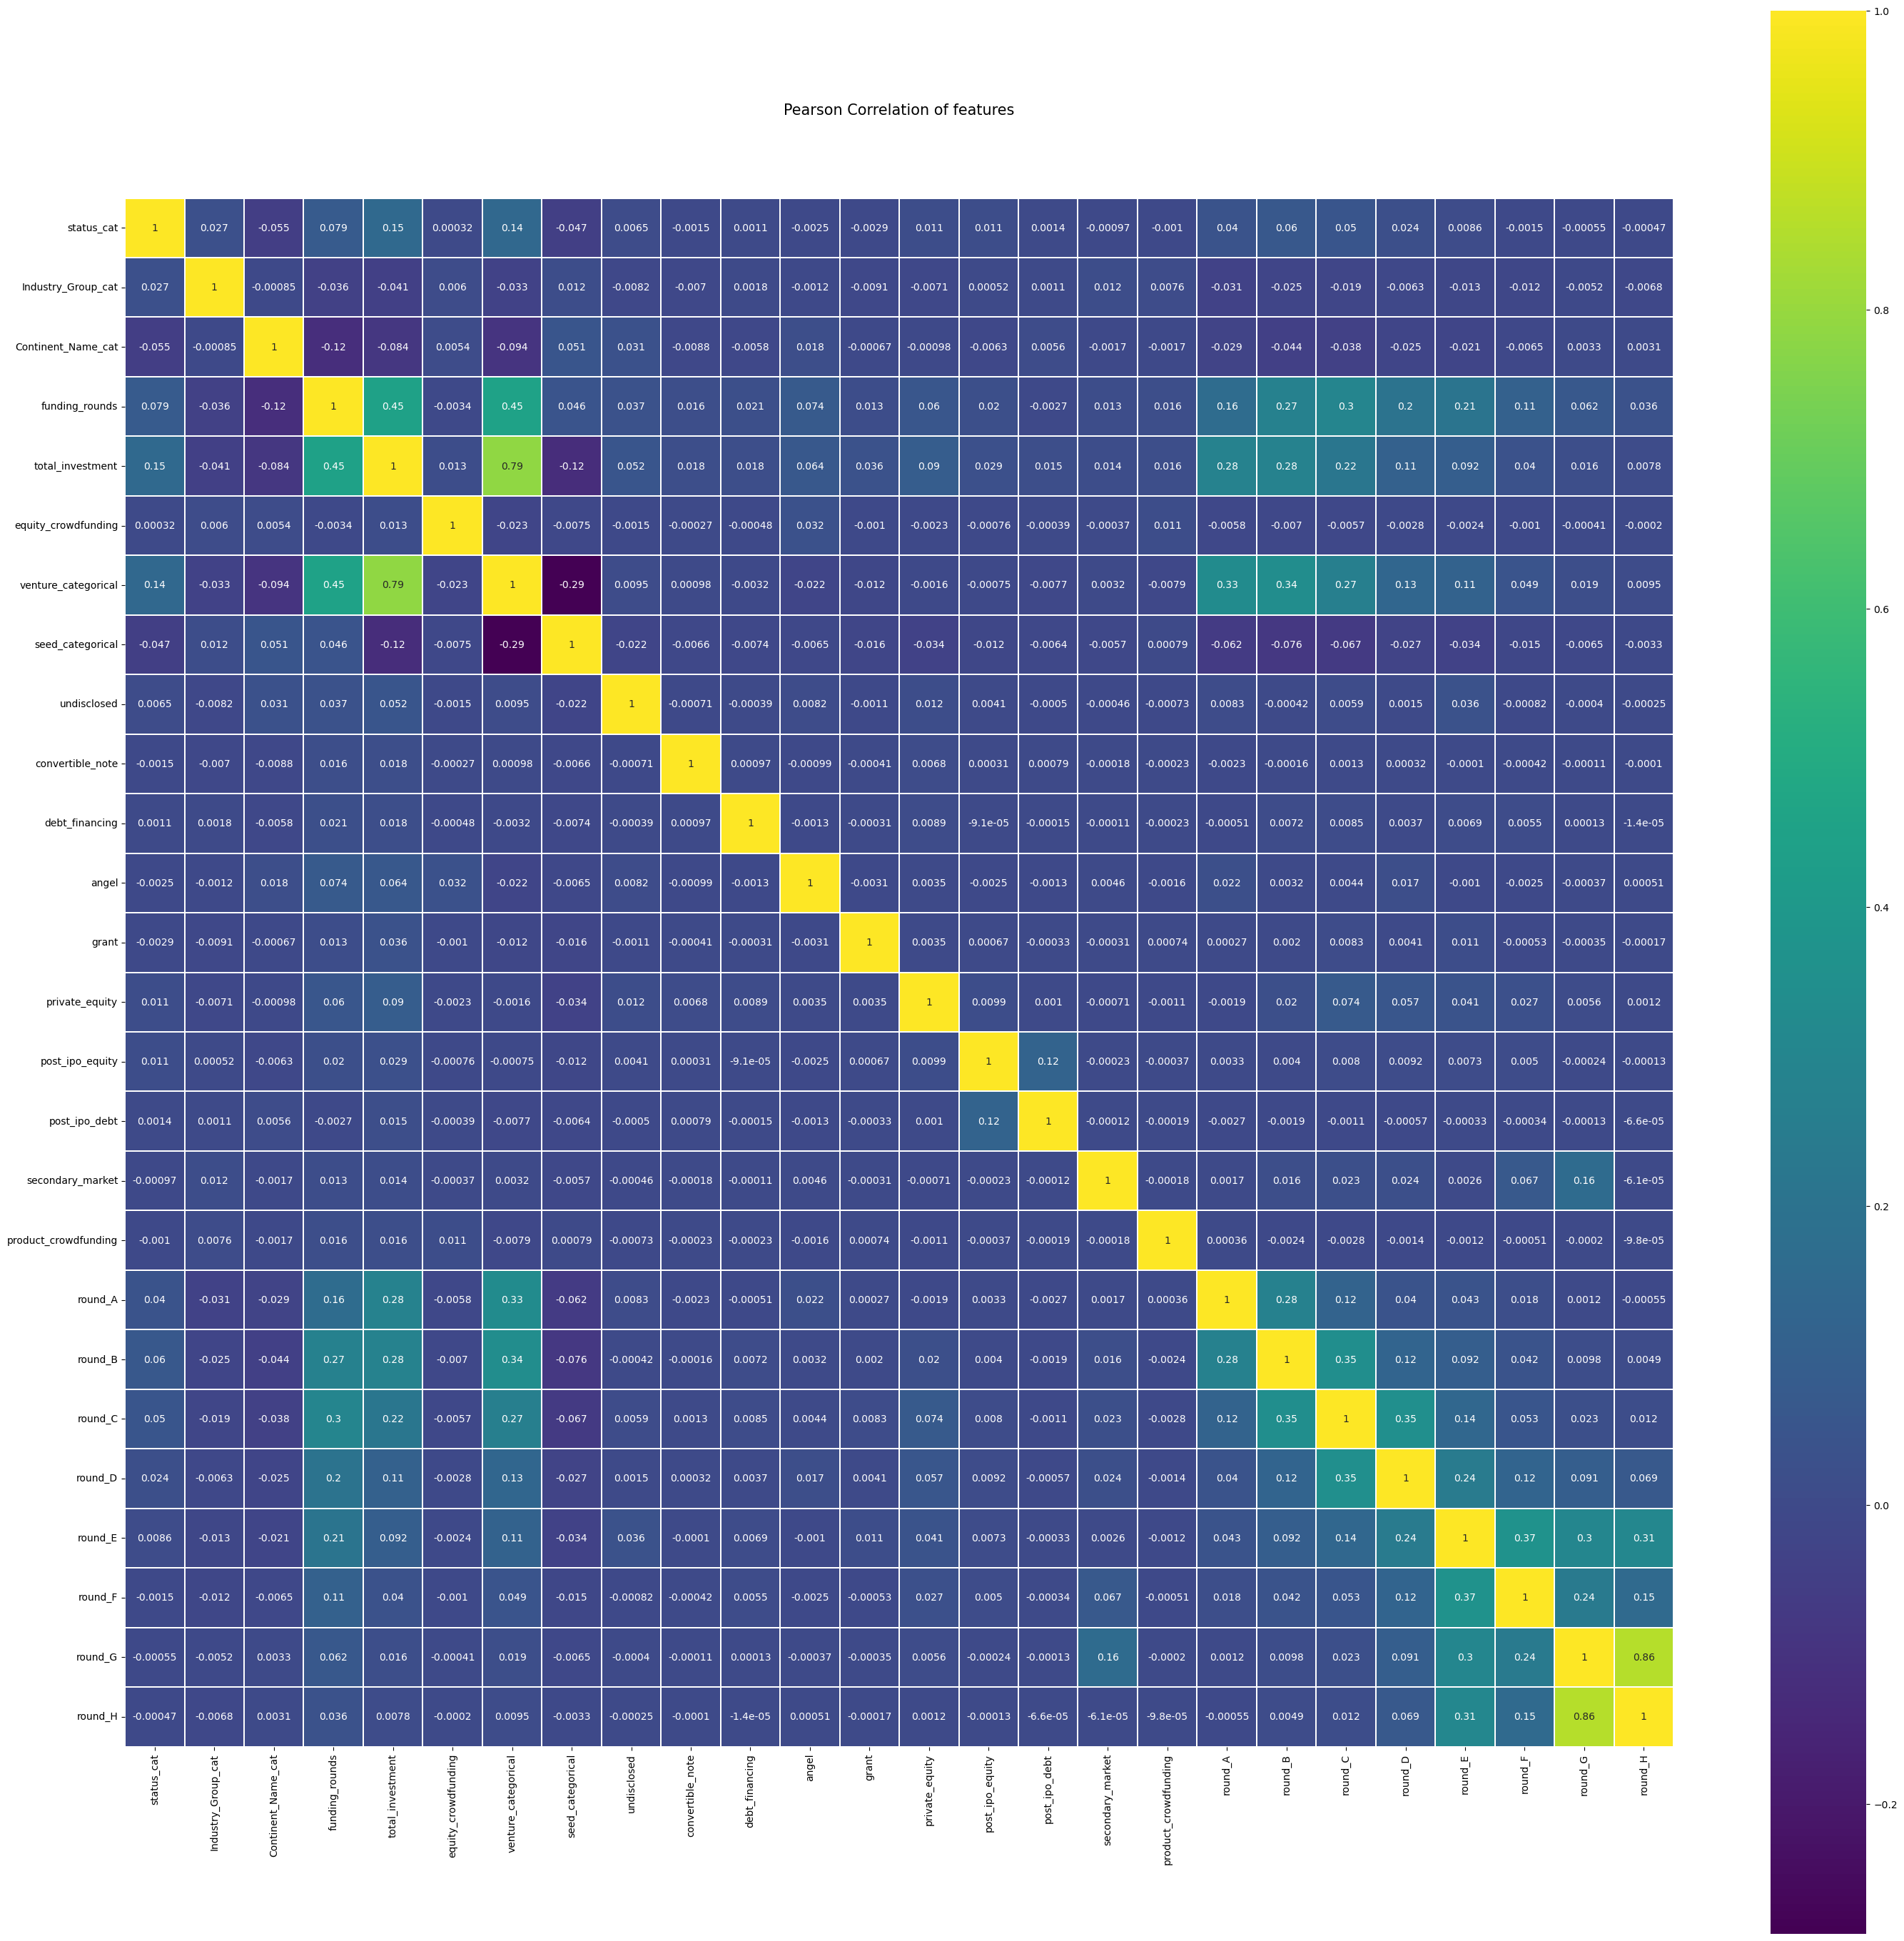

In [385]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True)

we can remove *equity_crowdfunding, undisclosed, convertible_note, grant , post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_G, round_H* as there is low correlation

In [386]:
df3.shape

(40455, 26)

In [387]:
df3 = df3[['status_cat', 'Industry_Group_cat', 'Continent_Name_cat',
       'funding_rounds', 'total_investment', 'venture_categorical', 'seed_categorical', 'debt_financing', 'angel',
       'private_equity', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E',
       'round_F']]
df3.shape

(40455, 16)

# Hypothesis Testing

### One sample t-test

In [392]:
alpha = 0.05

null_hypothesis = 5000000

t_stat, p_value = ttest_1samp(df['funding_total_usd'], null_hypothesis)

if p_value < alpha:
    print("Reject the null hypothesis. Mean total investment is significantly different from", null_hypothesis)
else:
    print("Fail to reject the null hypothesis. Mean total investment is not significantly different from", null_hypothesis)

Fail to reject the null hypothesis. Mean total investment is not significantly different from 5000000


### Two sample t-test

In [397]:
alpha = 0.05

null_hypothesis = "Mean total investment is the same for successful and unsuccessful startups"

successful_startups = df[df['status'] == 'operating']
unsuccessful_startups = df[df['status'] == 'closed']

t_stat, p_value = ttest_ind(successful_startups['funding_total_usd'], unsuccessful_startups['funding_total_usd'])

if p_value < alpha:
    print("Reject the null hypothesis. Mean total investment is significantly different between successful and unsuccessful startups.")
else:
    print("Fail to reject the null hypothesis. Mean total investment is not significantly different between successful and unsuccessful startups.")

Fail to reject the null hypothesis. Mean total investment is not significantly different between successful and unsuccessful startups.


### Chi-square test

In [395]:
alpha = 0.05

null_hypothesis = "There is no relationship between startup success and industry group"

contingency_table = pd.crosstab(df3['status_cat'], df3['Industry_Group_cat'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between startup success and industry group.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between startup success and industry group.")

Reject the null hypothesis. There is a significant relationship between startup success and industry group.


### ANOVA Test

In [420]:
model = ols('funding_total_usd ~ Industry_Group', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq       df         F    PR(>F)
Industry_Group  1.745109e+18     42.0  1.501657  0.019362
Residual        1.118183e+21  40412.0       NaN       NaN


p-value is 0.019362, which is less than the standard significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the means of the "total_investment" variable between at least two Industry_Groups.

In [423]:
model = ols('funding_total_usd ~ Continent_name', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq       df         F    PR(>F)
Continent_name  3.251667e+17      4.0  2.936977  0.019339
Residual        1.119603e+21  40450.0       NaN       NaN


p-value is 0.019339, which is less than the standard significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the means of the "total_investment" variable between at least two Continent_name.

# Model

In [298]:
Y = df3.status_cat 
X = df3.drop('status_cat', axis = 1) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [299]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (32364, 15)
Shape of X_test=> (8091, 15)
Shape of Y_train=> (32364,)
Shape of Y_test=> (8091,)


### Decision Tree

In [300]:
# testing with regular decision tree
clf = DecisionTreeClassifier(random_state = 100) 
clf = clf.fit(X_train, Y_train)#train decison tree classifier

In [301]:
preds = clf.predict(X_test) # predict the response for test data

In [302]:
print(accuracy_score(Y_test,preds))
print(accuracy_score(Y_train,clf.predict(X_train)))

print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))
#accuracy score is high for training dataset which shows that it might be overfitting

0.8109010011123471
0.9327030033370411

Classification Report

              precision    recall  f1-score   support

      Closed       0.06      0.03      0.04       432
   Operating       0.87      0.93      0.90      6935
    Acquired       0.24      0.15      0.19       724

    accuracy                           0.81      8091
   macro avg       0.39      0.37      0.37      8091
weighted avg       0.77      0.81      0.79      8091



accuracy score is high for training dataset which shows that it might be overfitting

In [303]:
#Hyper parameter tuning
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,20),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,10)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10, # cross validation method
                    verbose = 1,
                    n_jobs = -1) # set to use all processors

grid.fit(X_train, Y_train)

Fitting 10 folds for each of 6498 candidates, totalling 64980 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 20)},
             verbose=1)

In [306]:
print(grid.best_params_)
grid.best_estimator_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 19}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=19)

In [307]:
#using paramerters from the grid search to create the model
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, min_samples_split=19, random_state=40)
clf.fit(X_train,Y_train) 
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print(accuracy_score(Y_train,y_train_pred),accuracy_score(Y_test,y_test_pred))
print('\nClassification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired'])) 

0.8659621802002224 0.85700160672352

Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00       432
   Operating       0.86      1.00      0.92      6935
    Acquired       0.00      0.00      0.00       724

    accuracy                           0.86      8091
   macro avg       0.29      0.33      0.31      8091
weighted avg       0.73      0.86      0.79      8091



test and train score are closer

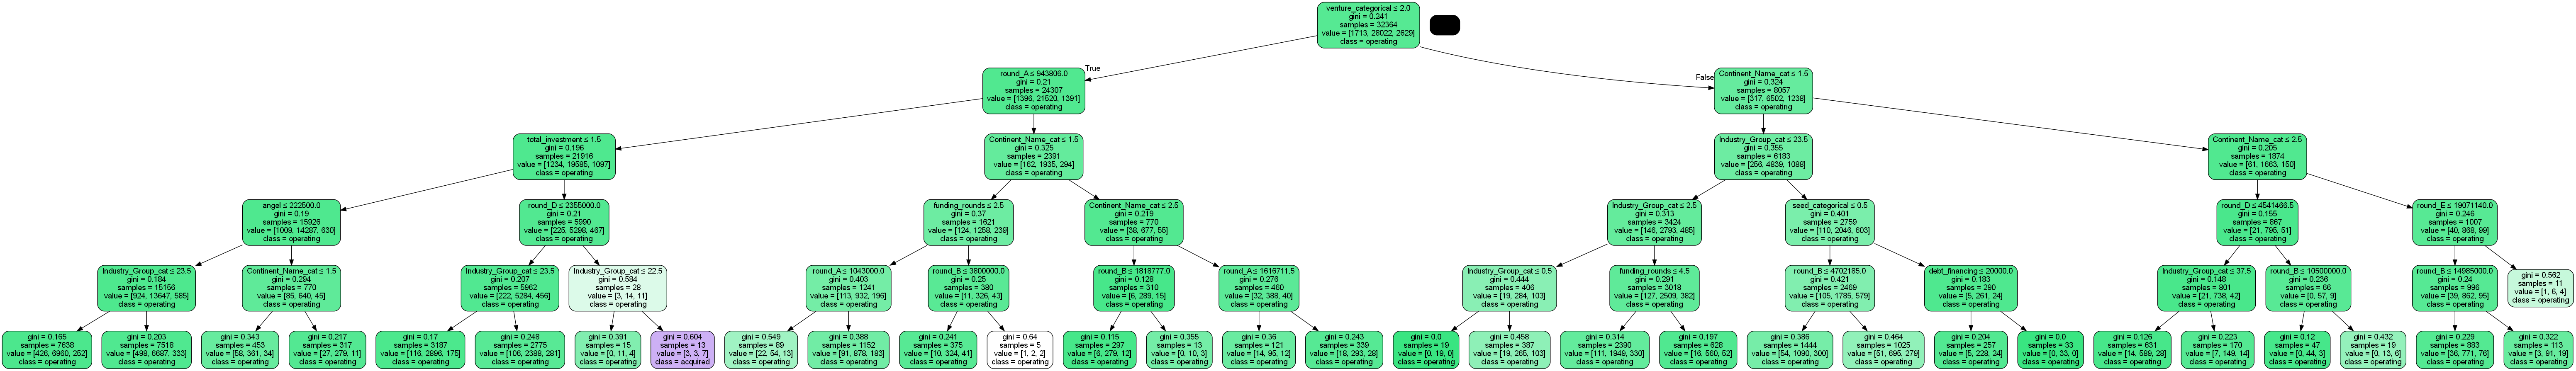

In [308]:
import graphviz
from six import StringIO
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image 
#visual representation of the model
xvar = df3.drop('status_cat', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['closed','operating','acquired'])

(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [309]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(6)#top 20 feature impacting decision tree split

,FeatureImportance
venture_categorical,0.342194
Industry_Group_cat,0.162263
Continent_Name_cat,0.159557
round_A,0.116093
seed_categorical,0.051214
round_B,0.041023


Text(0.5, 1.0, 'feature importance score')

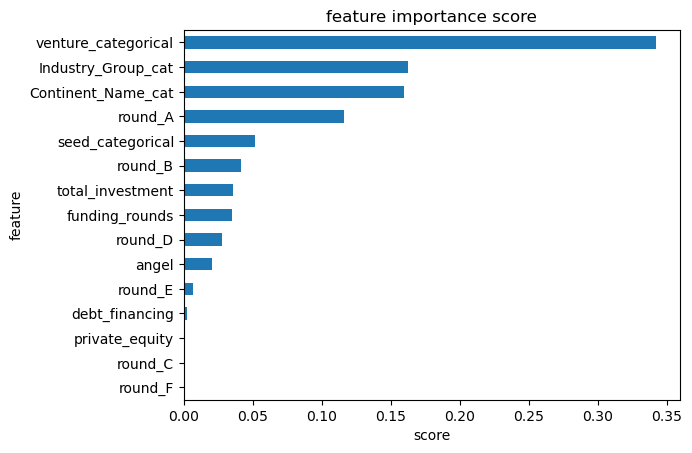

In [310]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(20).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Random Forest

In [425]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [426]:
rfc_pred_test = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

              precision    recall  f1-score   support

     Class 1       0.12      0.01      0.02       432
     Class 2       0.86      0.98      0.92      6935
     Class 3       0.28      0.06      0.10       724

    accuracy                           0.85      8091
   macro avg       0.42      0.35      0.35      8091
weighted avg       0.77      0.85      0.80      8091



Model is overfitting for class2 and bad at fitting 1 and 3

The important features are as follows:

In [427]:
importances = list(rfc.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Industry_Group_cat   Importance: 0.25
Variable: round_A              Importance: 0.18
Variable: round_B              Importance: 0.11
Variable: funding_rounds       Importance: 0.08
Variable: debt_financing       Importance: 0.08
Variable: angel                Importance: 0.06
Variable: round_C              Importance: 0.06
Variable: Continent_Name_cat   Importance: 0.03
Variable: total_investment     Importance: 0.03
Variable: round_D              Importance: 0.03
Variable: venture_categorical  Importance: 0.02
Variable: private_equity       Importance: 0.02
Variable: seed_categorical     Importance: 0.01
Variable: round_E              Importance: 0.01
Variable: round_F              Importance: 0.0


It showed that Industry Group is the most important feature.

In [316]:
#Using Random Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [317]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [318]:
rf_random.best_params_ # finding best parameter

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

We used random grid search for hyper parameter tuning where-- 'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True. Using these parameter the accuracy rate came up to be 0.86

In [428]:
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc.fit(X_train, Y_train) 

rfc_pred_test = rfc.predict(X_test)
print(accuracy_score(Y_train,rfc_pred_train),accuracy_score(Y_test,rfc_pred_test))
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))

0.9327030033370411 0.85700160672352
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       432
     Class 2       0.86      1.00      0.92      6935
     Class 3       0.00      0.00      0.00       724

    accuracy                           0.86      8091
   macro avg       0.29      0.33      0.31      8091
weighted avg       0.73      0.86      0.79      8091



Text(0.5, 1.0, 'feature importance score')

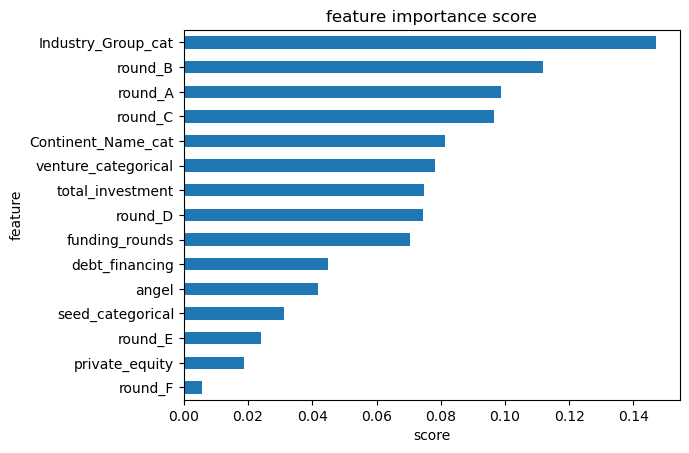

In [324]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(20).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')